In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import svm
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [215]:
df = pd.read_csv('final_full_clean_seek_data1.csv')

In [216]:
df.head()

,job_title,job_type,category,location,search_key,job_description_cleaned,low,high,median_sal
0,Data Analytics & Data Science Team Leader,Full Time,Information & Communication Technology,Melbourne,Data Science,The mission of the AFP is to provide dynamic ...,110172.0,119921.0,115046.5
1,"Consultant, Data Scientist",Full Time,Information & Communication Technology,Melbourne,Data Science,The Data Scientist will be accountable for des...,130000.0,140000.0,135000.0
2,Data Scientist,Full Time,Education & Training,Melbourne,Data Science,Data Scientist Fixed term 6 months role ...,90000.0,105000.0,97500.0
3,Sr. Machine Learning Engineer,Full Time,Science & Technology,Melbourne,Data Science,An exciting opportunity has opened up with a ...,150000.0,230000.0,190000.0
4,Senior Data Scientist,Contract/Temp,Information & Communication Technology,Melbourne,Data Science,This is an exciting opportunity to join a lead...,216000.0,230400.0,223200.0


In [4]:
df.shape

(368, 9)

In [5]:
df.category.unique()

array(['Information & Communication Technology', 'Education & Training',
       'Science & Technology', 'Engineering', 'Government & Defence',
       'Consulting & Strategy', 'Banking & Financial Services',
       'Construction', 'Human Resources & Recruitment', 'Sales',
       'Real Estate & Property', 'Marketing & Communications',
       'Accounting', 'Call Centre & Customer Service',
       'Design & Architecture', 'Mining, Resources & Energy',
       'Administration & Office Support', 'Retail & Consumer Products',
       'Manufacturing, Transport & Logistics', 'Healthcare & Medical',
       'Advertising, Arts & Media', 'Trades & Services',
       'Insurance & Superannuation', 'Community Services & Development'],
      dtype=object)

In [6]:
df.describe()

,low,high,median_sal
count,356.000000,367.000000,356.000000
mean,112529.078652,112302.299728,114150.696629
std,49283.562980,69485.609809,50602.080683
min,0.000000,0.000000,0.000000
25%,80000.000000,79999.000000,83625.000000
50%,110000.000000,115000.000000,107750.000000
75%,144000.000000,160000.000000,150000.000000
max,288000.000000,288000.000000,268800.000000


In [7]:
df.job_type.unique()

array(['Full Time', 'Contract/Temp', 'Part Time', 'Share this role'],
      dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 9 columns):
job_title                  368 non-null object
job_type                   368 non-null object
category                   368 non-null object
location                   368 non-null object
search_key                 368 non-null object
job_description_cleaned    368 non-null object
low                        356 non-null float64
high                       367 non-null float64
median_sal                 356 non-null float64
dtypes: float64(3), object(6)
memory usage: 26.0+ KB


In [217]:
med = df.median_sal.median()

In [218]:
med

107750.0

#### Salary Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002317472DA90>]],
      dtype=object)

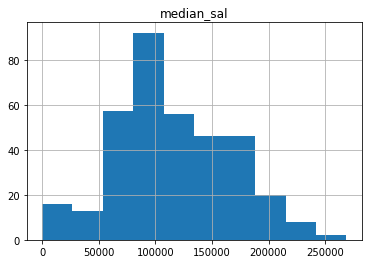

In [220]:
plt.title = ("Salary Distribution")
df.hist('median_sal')


#### Median Salary across different job types 

C:\Users\r_ani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


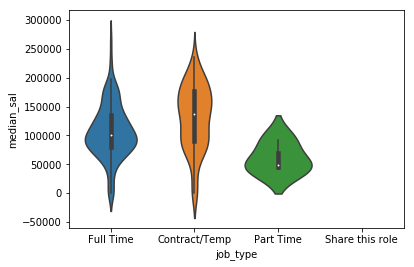

In [221]:
sns.violinplot(x = df.job_type, y = df.median_sal)

In [1]:
#### Contract/ Temp job has high median Salary

In [222]:
#Function to classify salary using median value:
def sal_type(sal):
    if sal > med:
        sal = 'high'
    else:
        sal = 'low'
    return sal

In [223]:
# Applying the function to median salary to classify the salary:
df['salary_type'] = df.median_sal.map(sal_type)

In [224]:
df.head()

,job_title,job_type,category,location,search_key,job_description_cleaned,low,high,median_sal,salary_type
0,Data Analytics & Data Science Team Leader,Full Time,Information & Communication Technology,Melbourne,Data Science,The mission of the AFP is to provide dynamic ...,110172.0,119921.0,115046.5,high
1,"Consultant, Data Scientist",Full Time,Information & Communication Technology,Melbourne,Data Science,The Data Scientist will be accountable for des...,130000.0,140000.0,135000.0,high
2,Data Scientist,Full Time,Education & Training,Melbourne,Data Science,Data Scientist Fixed term 6 months role ...,90000.0,105000.0,97500.0,low
3,Sr. Machine Learning Engineer,Full Time,Science & Technology,Melbourne,Data Science,An exciting opportunity has opened up with a ...,150000.0,230000.0,190000.0,high
4,Senior Data Scientist,Contract/Temp,Information & Communication Technology,Melbourne,Data Science,This is an exciting opportunity to join a lead...,216000.0,230400.0,223200.0,high


In [16]:
df.search_key.unique()

array(['Data Science', 'Data Analytics', 'Data Scientist', 'Data Analyst'],
      dtype=object)

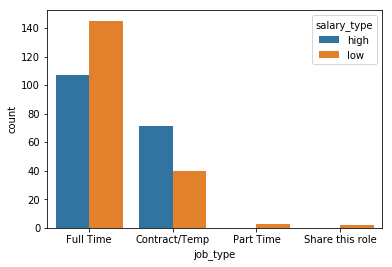

In [225]:
sns.countplot(df.job_type, hue = df.salary_type)

In [43]:
#### The above graph explains that pay will be high in contract type role when compared to full time

In [19]:
df.job_title.unique()

array(['Data Analytics & Data Science Team Leader',
       'Consultant, Data Scientist', 'Data Scientist',
       'Sr. Machine Learning Engineer', 'Senior Data Scientist',
       'Data Engineer', 'Data Modeller', 'Big Data Architect',
       'Lead Data Scientist', 'Data Integration Engineer ',
       'Platform Engineer - Hortonworks / Python',
       'Business Analyst | Digital ',
       'Senior Full-Stack Software Engineer (Java/PHP/Node)',
       'Data Architect - MongoDB',
       'Business Analyst | $600-$750 | Global Impact',
       'SURVEY STATISTICIAN/METHODOLOGIST',
       'Business Intelligence/ ETL Developer', 'Senior Devops Engineer',
       'Environmental Advisor - Western Suburbs - Major Rail Project',
       'Manager Systems Intelligence and Analytics', 'Kafka Specialist',
       'Data Analyst ', 'BI Developer/Analyst', 'Geodetic Surveyor',
       'Sustainability Advisor - Western Suburbs - Major Rail project',
       'Data Analyst (SAS & SQL)', 'Systems Analyst, Fulltime,

In [70]:
df.job_title[331] = 'Senior Machine Learning Engineer'

C:\Users\r_ani\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


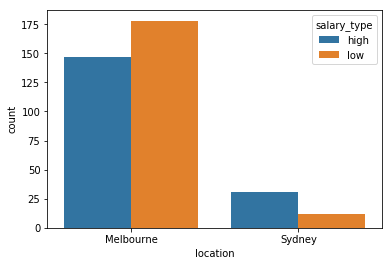

In [20]:
sns.countplot(df.location, hue = df.salary_type)

#### Since my search for jobs were focussed on melbourne, high volumes show up in Melbourne.
#### Have to note that though the volume of jobs are less in Sydney, the salary for most of the jobs are high when compared to Melbourne

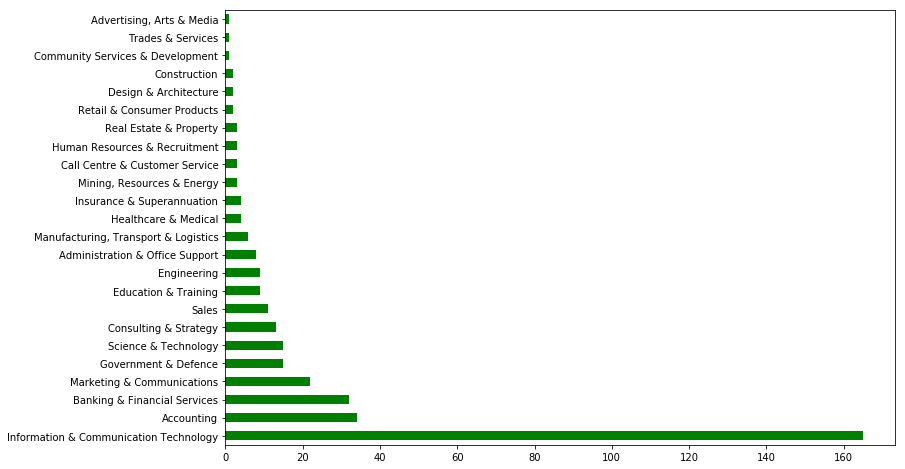

In [227]:
plt.figure(figsize=(12,8))
df.category.value_counts().plot(kind = 'barh', color = 'green')

#### The above graph shows the median salary in different job categories: Information and communications, Accounting, Banking, Finance, & Marketing Communications have high data related jobs & median salary.

In [79]:
df.to_csv('final_full_clean_seek_data2.csv', index = False)

In [57]:
df = pd.read_csv('final_full_clean_seek_data2.csv')

In [103]:
#df.job_type = df.job_type.map({'Full Time': 3, 'Contract/Temp': 2, 'Part Time': 1, 'Share this role': 0})

In [104]:
#df.job_type.unique()

array([3, 2, 1, 0], dtype=int64)

In [23]:
df.head(2)

,job_title,job_type,category,location,search_key,job_description_cleaned,low,high,median_sal,salary_type
0,Data Analytics & Data Science Team Leader,Full Time,Information & Communication Technology,Melbourne,Data Science,The mission of the AFP is to provide dynamic ...,110172.0,119921.0,115046.5,high
1,"Consultant, Data Scientist",Full Time,Information & Communication Technology,Melbourne,Data Science,The Data Scientist will be accountable for des...,130000.0,140000.0,135000.0,high


In [ ]:
##Factors that impact salary:

In [58]:
X = df['job_description_cleaned']

In [59]:
df.salary_type = df.salary_type.map({'high': 1, 'low': 0})

In [60]:
df.salary_type.value_counts()

0    190
1    178
Name: salary_type, dtype: int64

In [61]:
y = df.salary_type

In [62]:
#baseline accuracy
1. - np.mean(y)

0.5163043478260869

In [63]:
df.location.value_counts()

Melbourne    325
Sydney        43
Name: location, dtype: int64

In [108]:
#df.location = df.location.map({'Melbourne': 1, 'Sydney': 2})

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y, test_size = .33)

In [65]:
print(len(X_train))

246


In [66]:
print(len(X_test))

122


#### Tokenization of Job Description using CountVectorizer:

In [67]:
vect = CountVectorizer()

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [68]:
X_train_dtm.shape

(246, 5871)

In [69]:
vect.get_feature_names()

['00',
 '000',
 '00102',
 '0010506',
 '0010558',
 '0010769',
 '0010844',
 '0046220',
 '0054',
 '005idatascientist',
 '019',
 '02',
 '020',
 '0282',
 '0282512110',
 '03',
 '0377',
 '0396421684',
 '0396913661',
 '0408',
 '0410',
 '043',
 '0431161367',
 '0438877295',
 '0452411968',
 '0481868551',
 '06',
 '07',
 '08',
 '09',
 '0979',
 '10',
 '100',
 '1000',
 '10000',
 '100k',
 '100million',
 '102',
 '1020',
 '1025',
 '1061574',
 '108',
 '10pm',
 '11',
 '110',
 '111',
 '1120',
 '114',
 '1164',
 '119',
 '12',
 '120k',
 '121',
 '122',
 '129',
 '12m',
 '13',
 '130',
 '1300',
 '1370',
 '138',
 '14',
 '140k',
 '145',
 '148',
 '15',
 '150',
 '157',
 '160',
 '17',
 '170',
 '170k',
 '172',
 '18',
 '180',
 '1800',
 '19',
 '190',
 '1926',
 '1936',
 '1957',
 '1962',
 '1995',
 '1st',
 '20',
 '2000',
 '200058325',
 '200185243',
 '2005',
 '2006',
 '2008',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2020technical',
 '205',
 '2051',
 '20th',
 '21st',
 '22',
 '238',
 '24',
 '25',
 '250'

In [70]:
#using 1 gram and 2 gram
vect = CountVectorizer(ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(246, 41689)

In [71]:
X_train.shape[0]

246

In [72]:
print(vect.get_feature_names()[-50:])

['your strengths', 'your strong', 'your success', 'your suitability', 'your supply', 'your talent', 'your team', 'your teammates', 'your thing', 'your time', 'your tool', 'your toolkit', 'your versatile', 'your work', 'your written', 'your xc3', 'yourcvvia', 'yourcvvia the', 'youre', 'youre interested', 'yourself', 'yourself an', 'yourself because', 'yourself build', 'yourself in', 'yourself on', 'yourself reliable', 'yourself suitable', 'yourself tele', 'yourself the', 'yourself to', 'yrs', 'yrs exp', 'zale', 'zale stobbs', 'zealand', 'zealand and', 'zealand family', 'zealand hong', 'zealand office', 'zealand region', 'zealand will', 'zealand years', 'zero', 'zero harm', 'zoe', 'zoe crouch', 'zoe winn', 'zwinn', 'zwinn projectresourcepartners']


In [73]:
##predicting using countvectorizer:
vect = CountVectorizer()

#creating document-term matrices
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

#using naive bayes to predict the salary:
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred = nb.predict(X_test_dtm)

# Accuracy Calculation:
print(metrics.accuracy_score(y_test, y_pred))

0.7049180327868853


In [74]:
#Creating a function to accept vectorizer and calculate accuracy:
def tokenizer_text(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print("Features: ", X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred = nb.predict(X_test_dtm)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

In [75]:
# with 1 gram, 2 gram
vect = CountVectorizer(ngram_range=(1,2))
tokenizer_text(vect)

Features:  41689
Accuracy:  0.6885245901639344


#### Removing stopwords:


In [76]:
#Using countvectorizer:
vect = CountVectorizer(stop_words='english')

# validation
tokenizer_text(vect)

Features:  5642
Accuracy:  0.6967213114754098


In [77]:
#using max features option limiting to 100 features:
vect = CountVectorizer(stop_words='english', max_features=100)
tokenizer_text(vect)

Features:  100
Accuracy:  0.6475409836065574


In [78]:
#minimum frequency of words/documents that appear only twice:
vect = CountVectorizer(ngram_range=(1,2), min_df =2)
tokenizer_text(vect)

Features:  15571
Accuracy:  0.7049180327868853


In [79]:
##slightly better. Now will try Textblob and lemmatizer:

# Defining a function which accepts text and returns list of lemmas:
def text_lemmas(text):
    text = str(text).lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [80]:
#using lemmass in countvectorizer
vect = CountVectorizer(analyzer=text_lemmas)
tokenizer_text(vect)

Features:  5636
Accuracy:  0.6639344262295082


#### TF-IDF:

In [81]:
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(X_train)
features = vect.get_feature_names()
dtm.shape

(246, 5642)

In [83]:
#using analyser(lemmas, 1 gram & 2gram) using Mutinomial naive bayes:
vect = TfidfVectorizer(stop_words='english')
tokenizer_text(vect)

Features:  5642
Accuracy:  0.7295081967213115


In [84]:
# turning into dataframe
X_train = pd.DataFrame(vect.transform(X_train).todense(), columns = vect.get_feature_names())

In [85]:
X_train.head()

,00,000,00102,0010506,0010558,0010769,0010844,0046220,0054,005idatascientist,...,youll,young,yourcvvia,youre,yrs,zale,zealand,zero,zoe,zwinn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
word_count = X_train.sum(axis = 0)

In [88]:
d = word_count.sort_values(ascending = False).head(10)

In [93]:
d

data          20.493428
experience    13.463320
business      13.276250
xe2           11.136073
x80           11.020104
role           9.512946
skills         9.285152
team           8.538150
management     7.899540
work           7.579928
dtype: float64

In [97]:
X_train.shape

(246, 5642)

In [98]:
features_job = X_train[['data', 'experience', 'business', 'role', 'team', 'management', 'work']]

In [106]:
X_test = pd.DataFrame(vect.transform(X_test).todense(),
                      columns=vect.get_feature_names())

In [108]:
X_test.shape

(122, 5642)

In [109]:
feature_test = X_test[['data', 'experience', 'business', 'role', 'team', 'management', 'work']]

In [110]:
feature_test.head()

,data,experience,business,role,team,management,work
0,0.023029,0.048360,0.081730,0.051846,0.053811,0.000000,0.000000
1,0.091533,0.160180,0.000000,0.034345,0.035647,0.000000,0.039103
2,0.075039,0.000000,0.000000,0.042234,0.021918,0.026936,0.048085
3,0.063340,0.044337,0.024977,0.023766,0.000000,0.030315,0.027059
4,0.030436,0.095872,0.108018,0.068522,0.000000,0.000000,0.000000


#### Pipeline with tfIdf and Logistic regression model

In [3]:
#Building a pipeline with tfid as the accuracy score for tfidf is better than couuntvectorizer and trying out on logistic regression:
model = make_pipeline(TfidfVectorizer(stop_words = 'english', sublinear_tf = True, max_df=0.5, max_features=1000), LogisticRegression(),)

In [52]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print("Number of features:", len(model.steps[0][1].get_feature_names()))

0.7049180327868853
Number of features: 1000


C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [55]:
# turning into dataframe
X_train = pd.DataFrame(cvec.transform(X_train).todense(), columns = cvec.get_feature_names())

In [183]:
X_train.head()

,00,000,00102,0010506,0010558,0010769,0010844,0046220,0054,005idatascientist,...,youll,young,yourcvvia,youre,yrs,zale,zealand,zero,zoe,zwinn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
word_count = X_train.sum(axis = 0)

In [210]:
d = word_count.sort_values(ascending = False).head(10)

In [211]:
d

data          1149
experience     744
business       648
xe2            533
x80            521
skills         504
role           498
team           451
work           379
management     348
dtype: int64

In [188]:
X_test = pd.DataFrame(cvec.transform(X_test).todense(),
                      columns=cvec.get_feature_names())

#### Logistic Regression Model

In [225]:
#logistic regression
lg = LogisticRegression()
lg.fit(X_train, y_train)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [226]:
lg.score(X_test, y_test)

0.6557377049180327

In [227]:
yhat = lg.predict(X_test)

#### Other Classification Models

In [196]:
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, RandomForestClassifier
bg = BaggingClassifier()
et = ExtraTreesClassifier()
bg.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [193]:
bg.score(X_test, y_test)

0.5983606557377049

In [194]:
et.fit(X_train, y_train)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [195]:
et.score(X_test, y_test)

0.5983606557377049

In [197]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [198]:
rf.score(X_test, y_test)

0.6229508196721312

In [204]:
# Cross validation with logistic Regression
logistic = LogisticRegression()
print(cross_val_score(logistic, X_train, y_train, cv=5, scoring='accuracy').mean())


# Let's try a SVM
clf = svm.SVC()
print(cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean())

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.643295918367347


C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

0.6220544217687075


In [134]:
#Logistic regression with TFID vectorizer gave 70.5%
#Multinomial Nb with TFID vectorizer gave 72.9
from sklearn.metrics import roc_curve, auc

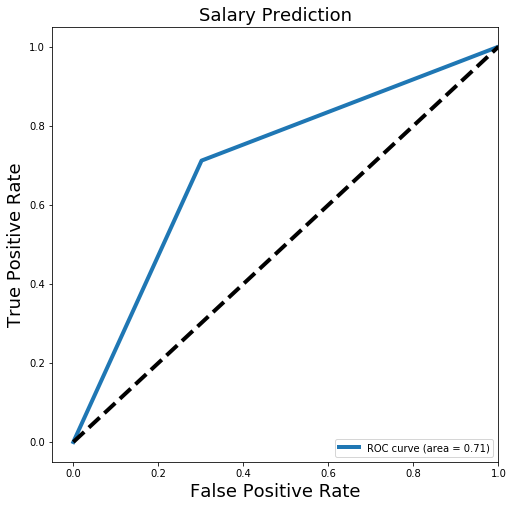

In [135]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Salary Prediction', fontsize=18)
plt.legend(loc="lower right")
plt.show()

#### The above ROC curve gives 72% accuracy in salary prediction

In [234]:
df.head()

,job_title,job_type,category,location,search_key,job_description_cleaned,low,high,median_sal,salary_type
0,Data Analytics & Data Science Team Leader,Full Time,Information & Communication Technology,Melbourne,Data Science,The mission of the AFP is to provide dynamic ...,110172.0,119921.0,115046.5,NaN
1,"Consultant, Data Scientist",Full Time,Information & Communication Technology,Melbourne,Data Science,The Data Scientist will be accountable for des...,130000.0,140000.0,135000.0,NaN
2,Data Scientist,Full Time,Education & Training,Melbourne,Data Science,Data Scientist Fixed term 6 months role ...,90000.0,105000.0,97500.0,NaN
3,Senior Machine Learning Engineer,Full Time,Science & Technology,Melbourne,Data Science,An exciting opportunity has opened up with a ...,150000.0,230000.0,190000.0,NaN
4,Senior Data Scientist,Contract/Temp,Information & Communication Technology,Melbourne,Data Science,This is an exciting opportunity to join a lead...,216000.0,230400.0,223200.0,NaN


In [236]:
df.job_title.unique()

array(['Data Analytics & Data Science Team Leader',
       'Consultant, Data Scientist', 'Data Scientist',
       'Senior Machine Learning Engineer', 'Senior Data Scientist',
       'Data Engineer', 'Data Modeller', 'Big Data Architect',
       'Lead Data Scientist', 'Data Integration Engineer ',
       'Platform Engineer - Hortonworks / Python',
       'Business Analyst | Digital ',
       'Senior Full-Stack Software Engineer (Java/PHP/Node)',
       'Data Architect - MongoDB', 'Business Analyst',
       'SURVEY STATISTICIAN/METHODOLOGIST',
       'Business Intelligence/ ETL Developer', 'Business Analyst Senior',
       'Senior Devops Engineer',
       'Environmental Advisor - Western Suburbs - Major Rail Project',
       'Manager Systems Intelligence and Analytics', 'Kafka Specialist',
       'Data Analyst ', 'BI Developer/Analyst', 'Geodetic Surveyor',
       'Sustainability Advisor - Western Suburbs - Major Rail project',
       'Data Analyst (SAS & SQL)', 'Systems Analyst, Fulltim

#### Taking the top features using TFID and using other parameters as shown which has impact on salary 
#### like location, job type and job title will predict the median salary of job using regression techniques.

In [99]:
d = pd.read_csv('final_full_clean_seek_data2.csv')

In [100]:
d.head(2)

,job_title,job_type,category,location,search_key,job_description_cleaned,low,high,median_sal,salary_type
0,Data Analytics & Data Science Team Leader,Full Time,Information & Communication Technology,Melbourne,Data Science,The mission of the AFP is to provide dynamic ...,110172.0,119921.0,115046.5,high
1,"Consultant, Data Scientist",Full Time,Information & Communication Technology,Melbourne,Data Science,The Data Scientist will be accountable for des...,130000.0,140000.0,135000.0,high


In [ ]:
#Mapping and decoding the variables.

In [101]:
d.job_type = d.job_type.map({'Full Time': 3, 'Contract/Temp': 2, 'Part Time': 1, 'Share this role': 0})

In [102]:
d.salary_type = d.salary_type.map({'high': 1, 'low': 0})

In [103]:
d.location = d.location.map({'Melbourne': 1, 'Sydney': 2})

In [104]:
features_job.shape

(246, 7)

In [105]:
d.shape

(368, 10)

In [112]:
features_selected = pd.concat([features_job, feature_test], ignore_index= True, sort = False)

In [113]:
features_selected.head()

,data,experience,business,role,team,management,work
0,0.000000,0.092339,0.138716,0.065996,0.000000,0.084181,0.037570
1,0.000000,0.101579,0.038149,0.018150,0.000000,0.069453,0.020664
2,0.017047,0.035798,0.040334,0.019189,0.059750,0.024477,0.000000
3,0.014652,0.046152,0.069332,0.016493,0.034236,0.084149,0.000000
4,0.015773,0.000000,0.074636,0.035509,0.000000,0.000000,0.020214


In [114]:
features_selected.shape

(368, 7)

In [115]:
# merging these features with our job table:
raw_data = pd.concat([d, features_selected], axis =1)

In [116]:
raw_data.head()

,job_title,job_type,category,location,search_key,job_description_cleaned,low,high,median_sal,salary_type,data,experience,business,role,team,management,work
0,Data Analytics & Data Science Team Leader,3,Information & Communication Technology,1,Data Science,The mission of the AFP is to provide dynamic ...,110172.0,119921.0,115046.5,1,0.000000,0.092339,0.138716,0.065996,0.000000,0.084181,0.037570
1,"Consultant, Data Scientist",3,Information & Communication Technology,1,Data Science,The Data Scientist will be accountable for des...,130000.0,140000.0,135000.0,1,0.000000,0.101579,0.038149,0.018150,0.000000,0.069453,0.020664
2,Data Scientist,3,Education & Training,1,Data Science,Data Scientist Fixed term 6 months role ...,90000.0,105000.0,97500.0,0,0.017047,0.035798,0.040334,0.019189,0.059750,0.024477,0.000000
3,Senior Machine Learning Engineer,3,Science & Technology,1,Data Science,An exciting opportunity has opened up with a ...,150000.0,230000.0,190000.0,1,0.014652,0.046152,0.069332,0.016493,0.034236,0.084149,0.000000
4,Senior Data Scientist,2,Information & Communication Technology,1,Data Science,This is an exciting opportunity to join a lead...,216000.0,230400.0,223200.0,1,0.015773,0.000000,0.074636,0.035509,0.000000,0.000000,0.020214


In [121]:
raw_data.drop(columns = ['job_title_encoded'], axis = 1, inplace = True)

In [122]:
raw_data.shape

(368, 17)

In [123]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 17 columns):
job_title                  368 non-null object
job_type                   368 non-null int64
category                   368 non-null object
location                   368 non-null int64
search_key                 368 non-null object
job_description_cleaned    368 non-null object
low                        356 non-null float64
high                       367 non-null float64
median_sal                 356 non-null float64
salary_type                368 non-null int64
data                       368 non-null float64
experience                 368 non-null float64
business                   368 non-null float64
role                       368 non-null float64
team                       368 non-null float64
management                 368 non-null float64
work                       368 non-null float64
dtypes: float64(10), int64(3), object(4)
memory usage: 49.0+ KB


In [124]:
raw_data.corr()

,job_type,location,low,high,median_sal,salary_type,data,experience,business,role,team,management,work
job_type,1.000000,0.119699,-0.210137,-0.070415,-0.177957,-0.120083,-0.079824,-0.097631,0.040046,0.033955,0.034815,0.027194,0.032080
location,0.119699,1.000000,0.033667,0.087429,0.075214,0.172676,-0.043933,-0.098886,0.015978,0.013298,0.060988,-0.094504,-0.003700
low,-0.210137,0.033667,1.000000,0.485742,0.811612,0.632699,-0.053252,0.004443,0.073637,-0.053643,0.014013,0.000720,-0.055285
high,-0.070415,0.087429,0.485742,1.000000,0.904882,0.738293,-0.046441,-0.077094,0.068577,0.015699,0.078379,-0.000646,-0.058560
median_sal,-0.177957,0.075214,0.811612,0.904882,1.000000,0.796125,-0.049518,-0.040869,0.074306,-0.023473,0.048083,0.000927,-0.065617
salary_type,-0.120083,0.172676,0.632699,0.738293,0.796125,1.000000,-0.046875,-0.044587,0.088194,0.002469,0.035212,0.037108,-0.063460
data,-0.079824,-0.043933,-0.053252,-0.046441,-0.049518,-0.046875,1.000000,0.158902,-0.047001,-0.156054,-0.136842,-0.145314,-0.013015
experience,-0.097631,-0.098886,0.004443,-0.077094,-0.040869,-0.044587,0.158902,1.000000,0.060218,-0.006088,-0.067665,0.098593,0.025572
business,0.040046,0.015978,0.073637,0.068577,0.074306,0.088194,-0.047001,0.060218,1.000000,0.107943,0.129434,-0.024480,0.016520
role,0.033955,0.013298,-0.053643,0.015699,-0.023473,0.002469,-0.156054,-0.006088,0.107943,1.000000,0.061835,-0.020970,0.029959


In [125]:
raw_data1 = raw_data.copy()

In [129]:
raw_data1.drop(columns = ['low', 'high','salary_type'], axis = 1, inplace = True)

In [131]:
raw_data1.head(1)

,job_title,job_type,category,location,median_sal,data,experience,business,role,team,management,work
0,Data Analytics & Data Science Team Leader,3,Information & Communication Technology,1,115046.5,0.0,0.092339,0.138716,0.065996,0.0,0.084181,0.03757


In [130]:
raw_data1.drop(columns = ['search_key', 'job_description_cleaned'], axis = 1, inplace = True)

In [132]:
raw_data1.head(1)

,job_title,job_type,category,location,median_sal,data,experience,business,role,team,management,work
0,Data Analytics & Data Science Team Leader,3,Information & Communication Technology,1,115046.5,0.0,0.092339,0.138716,0.065996,0.0,0.084181,0.03757


In [133]:
raw_data1.category.unique()

array(['Information & Communication Technology', 'Education & Training',
       'Science & Technology', 'Engineering', 'Government & Defence',
       'Consulting & Strategy', 'Banking & Financial Services',
       'Construction', 'Human Resources & Recruitment', 'Sales',
       'Real Estate & Property', 'Marketing & Communications',
       'Accounting', 'Call Centre & Customer Service',
       'Design & Architecture', 'Mining, Resources & Energy',
       'Administration & Office Support', 'Retail & Consumer Products',
       'Manufacturing, Transport & Logistics', 'Healthcare & Medical',
       'Advertising, Arts & Media', 'Trades & Services',
       'Insurance & Superannuation', 'Community Services & Development'],
      dtype=object)

In [144]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# raw_data1['encode_job_title'] = raw_data1.job_title.map(lambda x: le.fit_transform(x))

In [145]:
raw_data1['encode_category'] = raw_data1.category.map({'Information & Communication Technology': 1, 'Education & Training': 2,
       'Science & Technology': 3, 'Engineering': 4, 'Government & Defence': 5,
       'Consulting & Strategy':6, 'Banking & Financial Services': 7,
       'Construction': 8, 'Human Resources & Recruitment': 9, 'Sales': 10,
       'Real Estate & Property': 11, 'Marketing & Communications': 12,
       'Accounting': 13, 'Call Centre & Customer Service': 14,
       'Design & Architecture': 15, 'Mining, Resources & Energy': 16,
       'Administration & Office Support': 17, 'Retail & Consumer Products': 18,
       'Manufacturing, Transport & Logistics': 19, 'Healthcare & Medical': 20,
       'Advertising, Arts & Media': 21, 'Trades & Services': 22,
       'Insurance & Superannuation': 23, 'Community Services & Development': 24})

In [146]:
raw_data1.encode_category.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [148]:
raw_data1.encode_category.isnull().sum()

0

In [155]:
raw_data1.head()

,job_title,job_type,category,location,median_sal,data,experience,business,role,team,management,work,encode_category
0,Data Analytics & Data Science Team Leader,3,Information & Communication Technology,1,115046.5,0.000000,0.092339,0.138716,0.065996,0.000000,0.084181,0.037570,1
1,"Consultant, Data Scientist",3,Information & Communication Technology,1,135000.0,0.000000,0.101579,0.038149,0.018150,0.000000,0.069453,0.020664,1
2,Data Scientist,3,Education & Training,1,97500.0,0.017047,0.035798,0.040334,0.019189,0.059750,0.024477,0.000000,2
3,Senior Machine Learning Engineer,3,Science & Technology,1,190000.0,0.014652,0.046152,0.069332,0.016493,0.034236,0.084149,0.000000,3
4,Senior Data Scientist,2,Information & Communication Technology,1,223200.0,0.015773,0.000000,0.074636,0.035509,0.000000,0.000000,0.020214,1


In [166]:
raw_data1.dropna(axis=0, inplace = True)

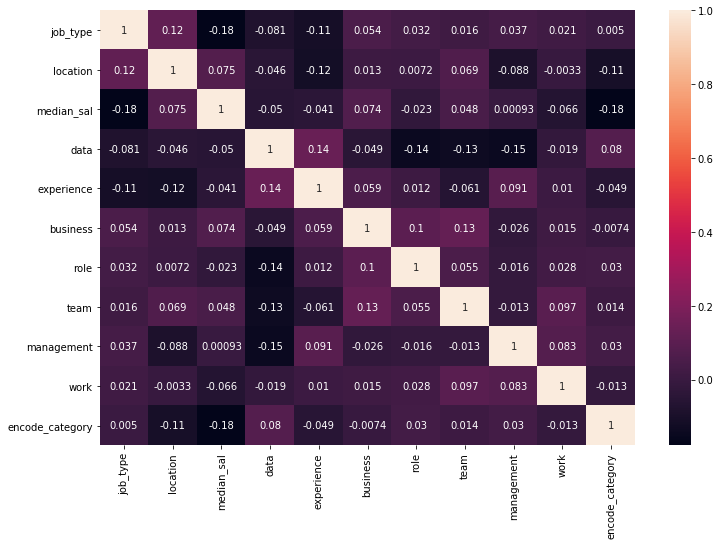

In [183]:
plt.figure(figsize=(12,8))
sns.heatmap(raw_data1.corr(), annot = True)

#### Factors distinguishing job category

In [185]:
X = raw_data1[['job_type', 'location', 'data', 'experience', 'business', 'role', 'team', 'management', 'median_sal']]

In [186]:
y = raw_data1.encode_category

In [187]:
X.head()

,job_type,location,data,experience,business,role,team,management,median_sal
0,3,1,0.000000,0.092339,0.138716,0.065996,0.000000,0.084181,115046.5
1,3,1,0.000000,0.101579,0.038149,0.018150,0.000000,0.069453,135000.0
2,3,1,0.017047,0.035798,0.040334,0.019189,0.059750,0.024477,97500.0
3,3,1,0.014652,0.046152,0.069332,0.016493,0.034236,0.084149,190000.0
4,2,1,0.015773,0.000000,0.074636,0.035509,0.000000,0.000000,223200.0


In [188]:
y.isnull().sum()

0

In [214]:
y.value_counts()/y.sum()

1     0.078820
13    0.016441
7     0.014507
12    0.010638
3     0.007253
5     0.007253
6     0.006286
10    0.004836
4     0.004352
2     0.003385
17    0.003385
19    0.002901
23    0.001934
16    0.001451
11    0.001451
8     0.000967
20    0.000967
9     0.000967
14    0.000967
15    0.000967
18    0.000967
22    0.000484
21    0.000484
24    0.000484
Name: encode_category, dtype: float64

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [190]:
X_train.shape

(284, 9)

In [191]:
y_train.shape

(284,)

In [209]:
lg = LogisticRegression()
rf = DecisionTreeClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier(n_neighbors=100, )


In [210]:
lg_score = cross_val_score(lg, X_train, y_train, cv =5)
rf_score = cross_val_score(rf, X_train, y_train, cv =5)
et_score = cross_val_score(et, X_train, y_train, cv =5)
knn_score = cross_val_score(knn, X_train, y_train, cv =5)
print(np.mean(lr_score))
print(np.mean(rf_score))
print(np.mean(et_score))
print(np.mean(knn_score))

-0.10911574833231921
0.2306705698672912
0.3955705414803775
0.4622437371371798


C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logis

In [ ]:
# knn gives better score